In [116]:
import math
import numpy as np
import pandas as pd
import random
import pdb
import time
from tqdm import tqdm
from copy import deepcopy
import matplotlib.pyplot as plt

In [2]:
class Node():
    def __init__(self):
        pass
    
    def evaluate(self, parameters):
        pass
    
    def get_written_form(self):
        pass
    
    def get_sub_nodes(self):
        pass
    
    def get_children(self):
        pass
    
class Unary(Node):
    def __init__(self, child_node, written_form):
        self.child_node = child_node
        self.written_form = written_form
    
    def evaluate(self, parameters):
        pass
    
    def get_written_form(self):
        if(self.child_node == None):
            return self.written_form
        else:
            return self.written_form + "(" + self.child_node.get_written_form() + ")"

    def get_sub_nodes(self):
        if(self.child_node == None):
            return [self]
        else:
            nodes = self.child_node.get_sub_nodes()
            nodes.append(self)
            return nodes
    
    def get_children(self):
        return [self.child_node]
    
class Binary(Node):
    def __init__(self, left_child, right_child, written_form):
        self.left_child = left_child
        self.right_child = right_child
        self.written_form = written_form
        pass
    
    def evaluate(self, parameters):
        self.left_eval = self.left_child.evaluate(parameters)
        self.right_eval = self.right_child.evaluate(parameters)
        pass
    
    def get_written_form(self):
        if( self.written_form == "+"):
            return self.left_child.get_written_form() + " + " + self.right_child.get_written_form()
        left_part  = (    self.left_child.get_written_form() if isinstance(self.left_child, Unary) else
                      "("+self.left_child.get_written_form()+")")
        right_part = (    self.right_child.get_written_form() if isinstance(self.right_child, Unary) else
                      "("+self.right_child.get_written_form()+")")
        return(left_part + " " + self.written_form + " " + right_part )
    
    def get_sub_nodes(self):
        nodes = []
        nodes += self.left_child.get_sub_nodes()
        nodes += self.right_child.get_sub_nodes()
        nodes.append(self)
        return nodes
    
    def get_children(self):
        return [self.left_child, self.right_child]
    
class Const(Unary):
    def __init__(self, num):
        super().__init__(None, str(num))
        self.num = num
    
    def evaluate(self, parameters):
        return self.num   
    
    def get_written_form(self):
        return str(round(self.num, 2))
    
    
class Param(Unary):
    def __init__(self, index):
        if index == 0:
            super().__init__(None, "x")
        elif index == 1:
            super().__init__(None, "y")   
        else:
            super().__init__(None, "x_" + str(index))
        self.index = index
    
    def evaluate(self, parameters):
        return parameters[self.index]

class Sin(Unary):
    def __init__(self, child_node):
        super().__init__(child_node, "sin")
    
    def evaluate(self, parameters):
        return math.sin(self.child_node.evaluate(parameters))

class Cos(Unary):
    def __init__(self, child_node):
        super().__init__(child_node, "cos")
    
    def evaluate(self, parameters):
        return math.cos(self.child_node.evaluate(parameters))
    
class Add(Binary):
    def __init__(self, left_child, right_child):
        super().__init__(left_child, right_child, "+")
        
    def evaluate(self, parameters):
        super().evaluate(parameters)
        return self.left_eval + self.right_eval
    
class Sub(Binary):
    def __init__(self, left_child, right_child):
        super().__init__(left_child, right_child, "-")
        
    def evaluate(self, parameters):
        super().evaluate(parameters)
        return self.left_eval - self.right_eval
    
class Mul(Binary):
    def __init__(self, left_child, right_child):
        super().__init__(left_child, right_child, "*")
        
    def evaluate(self, parameters):
        super().evaluate(parameters)
        return self.left_eval * self.right_eval
    
class Div(Binary):
    def __init__(self, left_child, right_child):
        super().__init__(left_child, right_child, "/")
        
    def evaluate(self, parameters):
        super().evaluate(parameters)
        left = self.left_eval
        right = self.right_eval
        if right == 0:
            return 1000
        return left / right
    
class Pow(Binary):
    def __init__(self, left_child, right_child):
        super().__init__(left_child, right_child, "^")
        
    def evaluate(self, parameters):
        super().evaluate(parameters)
        return (self.left_eval ** self.right_eval)

In [3]:
nodes = []
nodes.append(Param(0))
nodes.append(Param(1))
nodes.append(Param(0))
nodes.append(Const(2))
nodes.append(Const(3))
nodes.append(Mul(nodes[0], nodes[1]))
nodes.append(Div(nodes[2], nodes[3]))
nodes.append(Sin(nodes[6]))
nodes.append(Add(nodes[5], nodes[7]))
nodes.append(Sub(nodes[8], nodes[4]))

root = nodes[-1]
params = [1,3]
print(root.get_written_form() + " = " +  str(root.evaluate(params)))

(x * y + sin(x / 2)) - 3 = 0.479425538604203


In [141]:
class Dataset():
    def __init__(self, samples, f, input_dim, interval):
        self.size = samples
        self.point_value = []
        for _ in range(samples):
            point = np.random.uniform(*interval, input_dim).tolist()
            if func != None:
                self.point_value.append((point, f.evaluate(point)))
            else:
                self.point_value.append((point, np.random.uniform(-10, 10, size= 1)[0]))
    
    def __len__(self):
        return self.size
    
    def loop(self):
        for point, value in self.point_value:
            yield point, value

    def add_dataset(self, dataset):
        self.size += dataset.size
        self.point_value += dataset.point_value

In [89]:
class Tree():
    def __init__(self, root):
        self.root = root
        
    def evaluate(self, parameters):
        return self.root.evaluate(parameters)
    
    @staticmethod
    def breed(T1, T2, loss_1, loss_2, ratio):
        pass
    
    def mutate(self, interval, mutation_factor):
        pass
    
    def get_written_form(self):
        return self.root.get_written_form()

class XpolyTree(Tree):
    def __init__(self, degree, interval, dim= None):
        self.degree = degree
        self.interval = interval
        coef = Const(random.uniform(*interval))
        root = coef
        nodes = [root]
        self.coefs = [coef]
        for i in range(1, degree + 1):
            x_i = Param(0)
            power = Pow(x_i, Const(i))
            coef = Const(random.uniform(*interval))
            self.coefs.append(coef)
            mult = Mul(coef, power)
            add = Add(mult, root)
            
            nodes += [coef, x_i, power, mult, add]
            root = add
        super().__init__(root)
    
    @staticmethod
    def breed(T1, T2, loss_1, loss_2, ratio):
        child = XpolyTree(T1.degree, T1.interval)
        for child_coef, coef_1, coef_2 in zip(child.coefs, T1.coefs, T2.coefs):
#             prob = math.exp(-loss_1) / (math.exp(-loss_1) + math.exp(-loss_2))
            child_coef.num =  np.random.choice([coef_1.num, coef_2.num], 1, p=[0.5, 0.5])[0]
        return child
    
    def mutate(self, scale, mutation_factor):
#         nudge_amount = np.random.uniform(-1, 1, len(self.coefs)).tolist()
#         coin = np.random.randint(2, size= 1)[0]
#         if coin:
#             for coef, nudge in zip(self.coefs, nudge_amount):
#                 coef.num += nudge
#         else:
        coin = np.random.randint(len(self.coefs), size= 1)[0]
        nudge_amount = np.random.uniform(-0.1, 0.1, 1)[0]
        self.coefs[coin].num += nudge_amount
                
class ComplexTree(Tree):
    def __init__(self, interval= None, root= None, dim= 1):
        self.dim = dim
        if root == None:
            root = self.get_simplex(interval)
            super().__init__(root)
        else:
            super().__init__(deepcopy(root))
    
    @staticmethod
    def breed(T1, T2, loss_1, loss_2, ratio):
        root_1 = deepcopy(T1.root)
        if len(root_1.get_sub_nodes()) > 15:
            return ComplexTree(root= root_1.left_child)
        root_2 = deepcopy(T2.root)
        if len(root_2.get_sub_nodes()) > 15:
            return ComplexTree(root= root_2.right_child)
        
        coin = np.random.uniform(size= 1)
        if(isinstance(root_1, Unary) or isinstance(root_2, Unary) or coin > 0.6):
            coin = np.random.randint(2, size= 1)[0]
            if coin == 0:
                return ComplexTree(root= Add(root_1, root_2))
            elif coin == 1:
                return ComplexTree(root= Mul(root_1, root_2))
            
        assert (isinstance(root_2, Binary) and isinstance(root_1, Binary))
        
        roots = [root_1, root_2]
        coin = np.random.randint(2, size= 1)[0]
        child_root = roots[coin]
        right_child = np.random.randint(2, size= 1)[0]
        partners_child = np.random.randint(2, size= 1)[0]
        if right_child:
            child_root.left_child = deepcopy(roots[1 - coin].left_child)
        else:
            child_root.right_child = deepcopy(roots[1 - coin].right_child)
        
        return ComplexTree(root= child_root)
    
    def mutate(self, scale, mutation_factor):
        node = self.root
        
        if isinstance(node, Const) or isinstance(node, Param) :
            self.root = self.get_simplex((-1, 1))
            return
        coin = 0
        while (not (isinstance(node, Const) or isinstance(node, Param))) and (coin < 1):
            father = node
            children = node.get_children()
            idx = np.random.choice(range(len(children)), size= 1)[0]
            node = children[idx]
            coin = np.random.uniform(size= 1)
        
        coin = np.random.uniform(size= 1)
        if (isinstance(node, Const) and coin > 0.4):
            node.num += np.random.normal(scale= 5, size = 1)[0]
            return
        
        instead = self.get_simplex((-1, 1))
        if isinstance(father, Unary):
            father.child_node = instead
        elif isinstance(father, Binary):
            if idx == 0:
                father.left_child = instead
            else:
                father.right_child = instead
            
    def get_simplex(self, interval, lin= False):
        coin = np.random.randint(self.dim, size= 1)[0]
        param = Param(coin)
        const = Const(np.random.uniform(interval)[0])
        
        coin = np.random.choice([0, 1, 2], size= 1, p= [0.3, 0.2, 0.5])[0]
        if lin:
            coin = np.random.choice([0, 2], size= 1, p= [0.25, 0.75])[0]
        if  (coin == 0):
            coin = np.random.randint(2, size= 1)[0]
            if coin:
                return param
            else:
                return const
        
        elif(coin == 1):
            coin = np.random.randint(2, size= 1)[0]
            if coin:
                return Sin(param)
            else:
                return Cos(param)
            
        elif(coin == 2):
            coin = np.random.choice([0, 1, 2, 3, 4], size= 1, p= [0.3, 0.2, 0.3, 0.1, 0.1])[0]
            if(coin == 0):
                return Add(param, const)
            elif(coin == 1):
                return Sub(param, const)
            elif(coin == 2):
                return Mul(param, const)
            elif(coin == 3):
                coin = np.random.randint(2, size= 1)[0]
                if coin == 0:
                    return Div(param, Const(np.random.uniform(1, 5, size= 1)[0]))
                else:
                    return Div(Const(np.random.uniform(1, 5, size= 1)[0]), param)
            elif(coin == 4):
                return Sub(const, param)
            elif(coin == 5):
                return Pow(param, Const(np.random.randint(-3, 3, size= 1)[0]))
                

In [127]:
class EvolutionaryTrainer():
    def __init__(self, dataset, population, breed, mutate):
        self.population = population
        self.population_count = len(population)
        self.dataset = dataset
        self.generation = 0
        self.best_losses = []
        self.mean_losses  = []
        self.breed = breed
        self.mutate = mutate
        self.best_sample = None
        
    def loss_of(self, tree):
        loss = 0
        for point, value in self.dataset.loop():
            loss += (value - tree.evaluate(point))**2
        return (loss / len(dataset)) #**0.5
    
    def selection(self, ratio):
        losses = []
        total_loss = 0
        for index, individual in enumerate(self.population):
            loss = self.loss_of(individual)
            losses.append((index, loss))
            total_loss += loss
        pop_size = len(self.population)
        losses.sort(key = lambda x:x[1])
        min_losses = losses[:int(pop_size*ratio)]
        pop_loss   = [( self.population[index], loss) for index, loss in min_losses]
        return pop_loss, total_loss / self.population_count
    
    def cross_over(self, pop_loss):
        probabilities = [math.exp(-i) for i in range(len(pop_loss))]
        sum_prob = sum(probabilities)
        probabilities = [x / sum_prob for x in probabilities]
        new_generation = [sample for sample, loss in pop_loss]
        new_gen_size = len(new_generation)
        
        ratio = 0.8 if self.basic_constrcutor != None else 1
        for _ in range(math.floor((self.population_count - new_gen_size) * ratio)):
            first, second = np.random.choice(range(len(pop_loss)), 2, p= probabilities)
            T1, loss_1 = pop_loss[first]
            T2, loss_2 = pop_loss[second]
            new_generation.append(self.breed(T1, T2, loss_1, loss_2, 1))
        
        for _ in range(math.ceil((self.population_count - new_gen_size) * (1 - ratio))):
            sample = self.basic_constrcutor((-1, 1), dim= len(self.dataset.point_value[0]))
            new_generation.append(sample)
        
        self.population = new_generation
    
    def mutation(self, to_mutate):
        for sample in to_mutate:
            self.mutate(sample, 1, 1) #1 * math.exp(-self.generation) + 
    
    def evolute(self, generation_count, selection_ratio, basic_constrcutor= None):
        self.basic_constrcutor = basic_constrcutor
        start_time = time.time()
        best_losses = []
        mean_losses  = []
        
        for i in range(generation_count):
            best_samples, mean_loss = self.selection(selection_ratio)
            self.best_sample = best_samples[0][0]
            print("Best sample: {0}, Loss: {1}".format(self.best_sample.get_written_form(), best_samples[0][1]))
            best_losses.append(best_samples[0][1])
            mean_losses.append(mean_loss)
            
            if float(best_samples[0][1]) < (10 ** (-3)):
                break;
                
            self.cross_over(best_samples)
            
            self.mutation(self.population[int(selection_ratio*self.population_count):])
            
            self.generation += 1
            
        print("Number of generations: {0}, Number of examinations: {1}".format(self.generation,
                                                             self.generation * selection_ratio * self.population_count))
        print("Execution time: {0}".format(time.time() - start_time))
        self.best_losses += best_losses
        self.mean_losses += mean_losses
        
    def show_trend(self):
        x1 = [i for i in range(len(self.best_losses))]
        y1 = self.best_losses
        y2 = self.mean_losses

        # Plotting the Data
        plt.plot(x1, y1, label="Best loss")
#         plt.plot(x1, y2, label="Mean loss")

        plt.xlabel('generation')
        plt.ylabel('loss')
        plt.title("Loss trend over generations")

#         plt.plot(y1, 'o:g', linestyle='--', linewidth='1')
#         plt.plot(y2, 'o:g', linestyle=':', linewidth='1')

        plt.legend()
        plt.show()

In [95]:
def compare(f, best, interval, dataset= None):
    if dataset == None:
        dataset = Dataset(1000, f, 1, interval)
    x1 = [x[0] for x, y in dataset.loop()]
    y =  [y for x, y in dataset.loop()]
    estimations = [best.evaluate(point) for point, value in dataset.loop()]

    # Plotting the Data
    plt.scatter(x1, y, label="Main")
    plt.scatter(x1, estimations, label="Prediction")
    
    plt.xlabel('X')
    plt.ylabel('F(X)')
    plt.title("Main vs Prediction")

    plt.legend()
    plt.show()

In [8]:
def compare_3d(f, best, interval):
    dataset = Dataset(1000, f, 2, interval)
    xs = [x[0] for x, y in dataset.loop()]
    ys =  [x[1] for x, y in dataset.loop()]
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    zs = [y for x, y in dataset.loop()]
    ax.scatter(xs,ys,zs, label="Main")
    
    estimations = [best.evaluate(point) for point, value in dataset.loop()]
    ax.scatter(xs,ys,estimations, label="Prediction")
    
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("F(X, Y)")
    ax.set_title("Main vs Prediction")

    plt.legend()
    plt.show()
    

In [9]:
param = Param(0)
power = Pow(param, Const(2))
add = Add(power, Const(-10))
function = add

Best sample: 2.99 * (x ^ 2) + -2.01 * (x ^ 1) + 1.29, Loss: 8159.614916608677
Best sample: 5.11 * (x ^ 2) + -0.11 * (x ^ 1) + -2.83, Loss: 13.320076045759706
Best sample: 5.11 * (x ^ 2) + -0.11 * (x ^ 1) + -2.83, Loss: 13.320076045759706
Best sample: 5.11 * (x ^ 2) + -0.11 * (x ^ 1) + -2.83, Loss: 13.320076045759706
Best sample: 5.11 * (x ^ 2) + -0.11 * (x ^ 1) + -2.83, Loss: 13.320076045759706
Best sample: 5.11 * (x ^ 2) + -0.11 * (x ^ 1) + -2.83, Loss: 13.320076045759706
Best sample: 5.0 * (x ^ 2) + -0.28 * (x ^ 1) + -1.12, Loss: 3.3409722842202147
Best sample: 5.0 * (x ^ 2) + -0.28 * (x ^ 1) + -1.12, Loss: 3.3409722842202147
Best sample: 5.0 * (x ^ 2) + -0.28 * (x ^ 1) + -1.12, Loss: 3.3409722842202147
Best sample: 5.0 * (x ^ 2) + -0.28 * (x ^ 1) + -1.12, Loss: 3.3409722842202147
Best sample: 5.0 * (x ^ 2) + -0.28 * (x ^ 1) + -1.12, Loss: 3.3409722842202147
Best sample: 5.0 * (x ^ 2) + -0.28 * (x ^ 1) + -1.12, Loss: 3.3409722842202147
Best sample: 5.0 * (x ^ 2) + -0.28 * (x ^ 1) + -

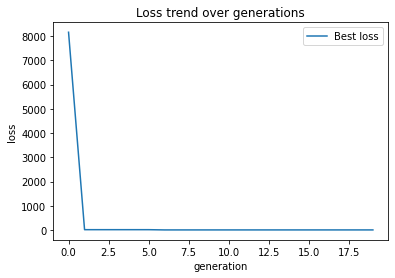

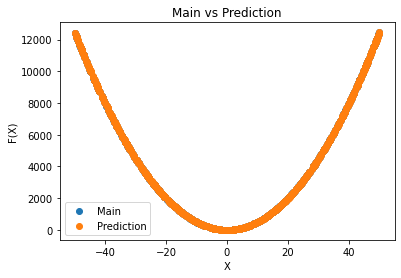

In [111]:
func = Mul(Const(5), Pow(Param(0), Const(2)))
dataset = Dataset(50, mul, 1, (-10, 10))
population = [XpolyTree(2, (3, -3)) for _ in range(500)]
trainer = EvolutionaryTrainer(dataset, population, XpolyTree.breed, XpolyTree.mutate)
trainer.evolute(20, 0.4)

trainer.show_trend()
compare(func, trainer.best_sample, (-50, 50))

Best sample: 0.01 * (x ^ 5) + 1.47 * (x ^ 4) + -2.56 * (x ^ 3) + -0.8 * (x ^ 2) + 1.42 * (x ^ 1) + -0.91, Loss: 1165514678849554.5
Best sample: -0.0 * (x ^ 5) + 1.14 * (x ^ 4) + -2.52 * (x ^ 3) + -0.66 * (x ^ 2) + 1.61 * (x ^ 1) + -1.71, Loss: 179868634540840.2
Best sample: 0.0 * (x ^ 5) + 0.7 * (x ^ 4) + -2.57 * (x ^ 3) + -0.2 * (x ^ 2) + 2.56 * (x ^ 1) + -1.62, Loss: 93948540205872.28
Best sample: 0.0 * (x ^ 5) + 0.7 * (x ^ 4) + -2.57 * (x ^ 3) + -0.2 * (x ^ 2) + 2.56 * (x ^ 1) + -1.62, Loss: 93948540205872.28
Best sample: 0.0 * (x ^ 5) + 0.7 * (x ^ 4) + -2.57 * (x ^ 3) + -0.2 * (x ^ 2) + 2.56 * (x ^ 1) + -1.62, Loss: 93948540205872.28
Best sample: 0.0 * (x ^ 5) + 0.7 * (x ^ 4) + -2.57 * (x ^ 3) + -0.2 * (x ^ 2) + 2.56 * (x ^ 1) + -1.62, Loss: 93948540205872.28
Best sample: 0.0 * (x ^ 5) + 0.7 * (x ^ 4) + -2.57 * (x ^ 3) + -0.2 * (x ^ 2) + 2.56 * (x ^ 1) + -1.62, Loss: 93948540205872.28
Best sample: 0.0 * (x ^ 5) + 0.7 * (x ^ 4) + -2.57 * (x ^ 3) + -0.2 * (x ^ 2) + 2.56 * (x ^ 1) + -

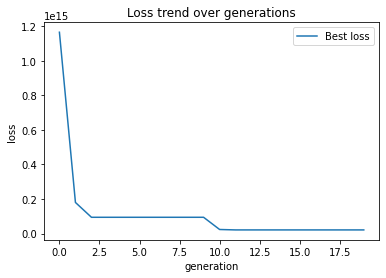

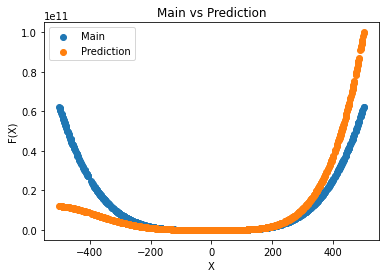

In [67]:
func = Add(Pow(Param(0), Const(4)), Add(Mul(Const(2), Pow(Param(0), Const(2))), Const(-3)))
dataset = Dataset(100, func, 1, (-100, 100))
population = [XpolyTree(5, (3, -3)) for _ in range(500)]
trainer = EvolutionaryTrainer(dataset, population, XpolyTree.breed, XpolyTree.mutate)
trainer.evolute(20, 0.1)

trainer.show_trend()
compare(func, trainer.best_sample, (-500, 500))

Best sample: -0.07 * (x ^ 5) + 0.42 * (x ^ 4) + -0.11 * (x ^ 3) + -2.59 * (x ^ 2) + 1.05 * (x ^ 1) + 1.45, Loss: 69.66194169225093
Best sample: 0.01 * (x ^ 5) + 0.42 * (x ^ 4) + -0.11 * (x ^ 3) + -2.59 * (x ^ 2) + 1.05 * (x ^ 1) + 1.45, Loss: 20.558499030425892
Best sample: 0.01 * (x ^ 5) + 0.33 * (x ^ 4) + -0.11 * (x ^ 3) + -2.59 * (x ^ 2) + 1.05 * (x ^ 1) + 1.45, Loss: 6.808760080399651
Best sample: 0.01 * (x ^ 5) + 0.33 * (x ^ 4) + -0.18 * (x ^ 3) + -2.59 * (x ^ 2) + 1.05 * (x ^ 1) + 1.45, Loss: 6.065079154543382
Best sample: 0.01 * (x ^ 5) + 0.31 * (x ^ 4) + -0.18 * (x ^ 3) + -2.59 * (x ^ 2) + 1.05 * (x ^ 1) + 1.45, Loss: 5.603912087771141
Best sample: 0.01 * (x ^ 5) + 0.31 * (x ^ 4) + -0.18 * (x ^ 3) + -2.49 * (x ^ 2) + 1.05 * (x ^ 1) + 1.45, Loss: 5.252458087848737
Best sample: 0.01 * (x ^ 5) + 0.29 * (x ^ 4) + -0.18 * (x ^ 3) + -2.49 * (x ^ 2) + 1.05 * (x ^ 1) + 1.45, Loss: 5.114012062531243
Best sample: 0.01 * (x ^ 5) + 0.29 * (x ^ 4) + -0.18 * (x ^ 3) + -2.41 * (x ^ 2) + 1.05 

Best sample: 0.01 * (x ^ 5) + 0.07 * (x ^ 4) + -0.2 * (x ^ 3) + -0.56 * (x ^ 2) + 1.04 * (x ^ 1) + 0.48, Loss: 0.23354840918172254
Best sample: 0.01 * (x ^ 5) + 0.07 * (x ^ 4) + -0.21 * (x ^ 3) + -0.56 * (x ^ 2) + 1.05 * (x ^ 1) + 0.48, Loss: 0.23259630095090597
Best sample: 0.01 * (x ^ 5) + 0.06 * (x ^ 4) + -0.21 * (x ^ 3) + -0.56 * (x ^ 2) + 1.05 * (x ^ 1) + 0.48, Loss: 0.22929599288046704
Best sample: 0.01 * (x ^ 5) + 0.06 * (x ^ 4) + -0.21 * (x ^ 3) + -0.52 * (x ^ 2) + 1.05 * (x ^ 1) + 0.49, Loss: 0.20203794942934603
Best sample: 0.01 * (x ^ 5) + 0.06 * (x ^ 4) + -0.21 * (x ^ 3) + -0.52 * (x ^ 2) + 1.05 * (x ^ 1) + 0.48, Loss: 0.1946646150468615
Best sample: 0.01 * (x ^ 5) + 0.06 * (x ^ 4) + -0.21 * (x ^ 3) + -0.49 * (x ^ 2) + 1.05 * (x ^ 1) + 0.48, Loss: 0.18152797105100874
Best sample: 0.01 * (x ^ 5) + 0.05 * (x ^ 4) + -0.21 * (x ^ 3) + -0.49 * (x ^ 2) + 1.05 * (x ^ 1) + 0.48, Loss: 0.17796594867550208
Best sample: 0.01 * (x ^ 5) + 0.05 * (x ^ 4) + -0.21 * (x ^ 3) + -0.45 * (x ^ 

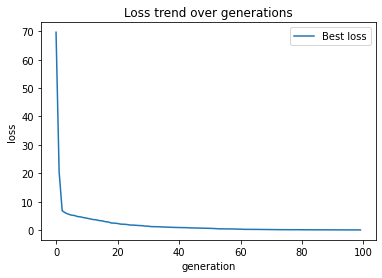

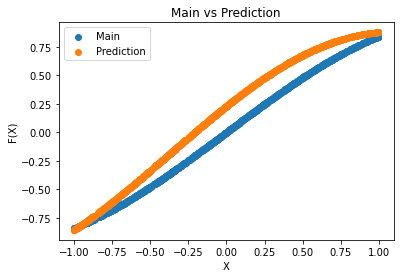

In [91]:
func = Sin(Param(0))
dataset = Dataset(100, func, 1, (-3.14, 3.14))
population = [XpolyTree(5, (3, -3)) for _ in range(500)]
trainer = EvolutionaryTrainer(dataset, population, XpolyTree.breed, XpolyTree.mutate)
trainer.evolute(100, 0.1)

trainer.show_trend()
compare(func, trainer.best_sample, (-1, 1))

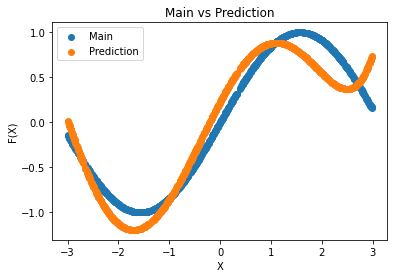

In [94]:
compare(func, trainer.best_sample, (-3, 3))

Best sample: 0.91, Loss: 0.49913630273032017
Best sample: sin(x) + 0.91, Loss: 0.00813665985286593
Best sample: sin(-0.96) + 0.91 + sin(x) + 0.91, Loss: 1.0480092049044508e-05


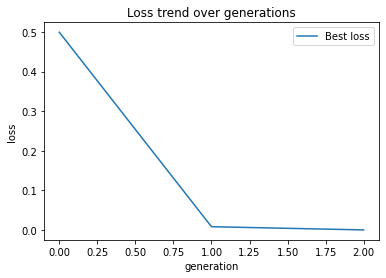

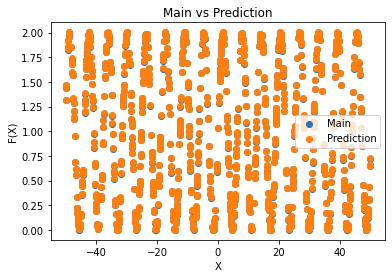

In [107]:
func = Add(Sin(Param(0)), Const(1))
dataset = Dataset(50, func, 1, (-10, 10))
population = [ComplexTree((-2, 2)) for _ in range(5000)]
trainer = EvolutionaryTrainer(dataset, population, ComplexTree.breed, ComplexTree.mutate)
trainer.evolute(20, 0.1)
# trainer.evolute(20, 0.01)
trainer.show_trend()
compare(func, trainer.best_sample, (-50, 50))

Best sample: cos(x), Loss: 0.4998127658267028
Best sample: cos(x + -1.0) + cos(x), Loss: 0.1502996805299839
Best sample: cos(x - 0.57 + -1.0) + cos(x), Loss: 5.518427663390709e-07


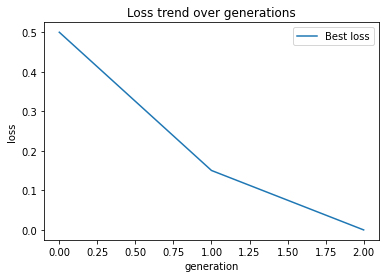

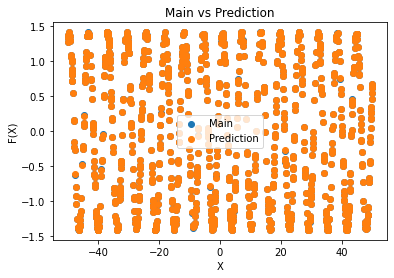

In [42]:
func = Add(Sin(Param(0)), Cos(Param(0)))
dataset = Dataset(50, func, 1, (-10, 10))
data = dataset.point_value[0]
population = [ComplexTree((-2, 2)) for _ in range(5000)]
trainer = EvolutionaryTrainer(dataset, population, ComplexTree.breed, ComplexTree.mutate)
trainer.evolute(5, 0.1)
# trainer.evolute(20, 0.01)
trainer.show_trend()
compare(func, trainer.best_sample, (-50, 50))

Best sample: sin(x), Loss: 568.0765171943563
Best sample: sin(x * 0.12) + sin(x), Loss: 559.3321877095626
Best sample: sin((x - -0.79) * 0.12) + sin(x) + sin(x * 0.12) + sin(x), Loss: 544.6079773375554
Best sample: sin((x - -0.79) * 0.12) + sin(x) + sin(x * 0.12) + sin(x), Loss: 544.6079773375554
Best sample: sin(x * 0.12) + sin(x) + sin(x * 0.13) + sin(x) + sin(x * 0.13) + sin(x) + sin(x * x) + sin(x), Loss: 525.4847904046533
Best sample: sin(x * 0.12) + sin(x) + sin(x * 0.13) + sin(x) + sin(x * 0.13) + sin(x) + sin(x * x) + sin(x), Loss: 525.4847904046533
Best sample: sin(x * 0.12) + sin(x) + sin(x * 0.13) + sin(x) + sin(x * 0.13) + sin(x) + sin(x * x) + sin(x), Loss: 525.4847904046533
Best sample: sin(x * 0.12) + sin(x) + sin(x * 0.13) + sin(x) + sin(x * 0.13) + sin(x) + sin(x * x) + sin(x), Loss: 525.4847904046533
Best sample: sin(x * 0.12) + sin(x) + sin(x * 0.13) + sin(x) + sin(x * 0.13) + sin(x) + sin(x * x) + sin(x), Loss: 525.4847904046533
Best sample: sin(x * 0.12) + sin(x) +

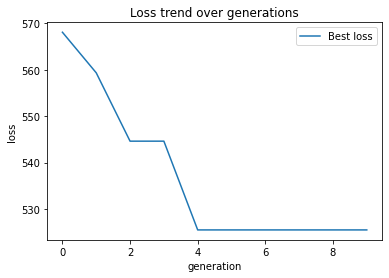

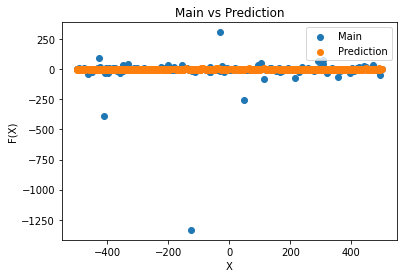

In [144]:
func = Div(Sin(Param(0)), Cos(Param(0)))
dataset = Dataset(50, func, 1, (-100, 100))
data = dataset.point_value[0]
population = [ComplexTree((-2, 2)) for _ in range(1000)]
trainer = EvolutionaryTrainer(dataset, population, ComplexTree.breed, ComplexTree.mutate)
trainer.evolute(10, 0.4)
trainer.show_trend()
compare(func, trainer.best_sample, (-500, 500))

Best sample: x - 0.04, Loss: 1.9701947389739332
Best sample: x + sin(x), Loss: 0.49301692754236115
Best sample: x + sin(x) + 0.0 + sin(x), Loss: 1.3113569160915428e-05


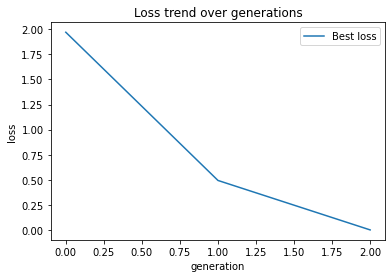

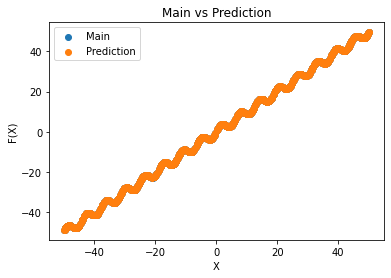

In [44]:
func = Add(Param(0), Mul(Const(2), Sin(Param(0))))
dataset = Dataset(50, func, 1, (-10, 10))
data = dataset.point_value[0]
population = [ComplexTree((-2, 2)) for _ in range(5000)]
trainer = EvolutionaryTrainer(dataset, population, ComplexTree.breed, ComplexTree.mutate)
trainer.evolute(20, 0.1)
trainer.show_trend()
compare(func, trainer.best_sample, (-50, 50))

Best sample: x * 0.1, Loss: 1440.4072373181575
Best sample: (x * cos(x)) * sin(x), Loss: 365.90622869789934
Best sample: (x * cos(x)) * sin(x) + (x * cos(x)) * sin(x), Loss: 2.524354896707238e-29


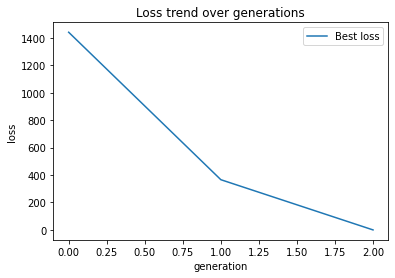

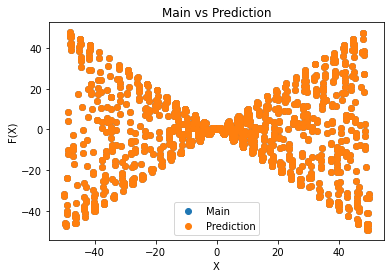

In [51]:
func = Mul(Param(0), Sin(Mul(Const(2), Param(0))))
dataset = Dataset(50, func, 1, (-100, 100))
data = dataset.point_value[0]
population = [ComplexTree((-2, 2)) for _ in range(500)]
trainer = EvolutionaryTrainer(dataset, population, ComplexTree.breed, ComplexTree.mutate)
trainer.evolute(10, 0.1)
trainer.show_trend()
compare(func, trainer.best_sample, (-50, 50))

Best sample: 1.0, Loss: 81.08214733362139
Best sample: 1.0 + 9.02, Loss: 0.00014510096358425276
Number of generations: 1, Number of examinations: 500.0
Execution time: 1.910367727279663


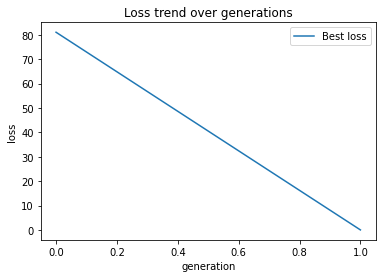

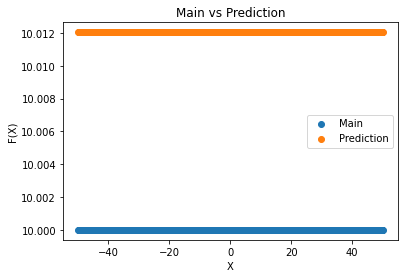

In [130]:
func = Const(10)
dataset = Dataset(50, func, 1, (-10, 10))
data = dataset.point_value[0]
population = [ComplexTree((-2, 2)) for _ in range(5000)]
trainer = EvolutionaryTrainer(dataset, population, ComplexTree.breed, ComplexTree.mutate)
trainer.evolute(20, 0.1)
trainer.show_trend()
compare(func, trainer.best_sample, (-50, 50))

Best sample: -1.99, Loss: 39206.10418226599
Best sample: -1.99 * 15.38, Loss: 28716.00300179212
Best sample: -13.1 * 15.38, Loss: 2.0929097262870333
Best sample: -1.99 * 12.78 + -11.54 * 15.12, Loss: 0.0009264080410018722
Number of generations: 3, Number of examinations: 6000.000000000001
Execution time: 6.697886943817139


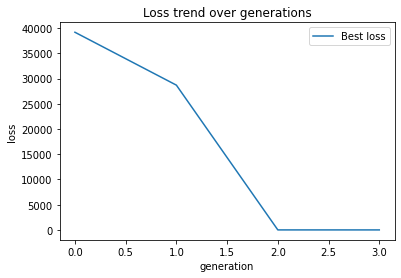

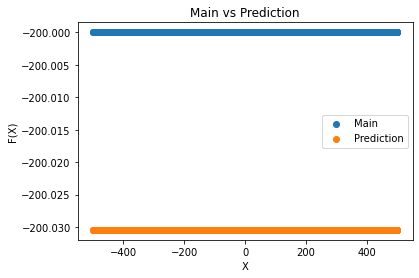

In [129]:
func = Const(-200)
dataset = Dataset(50, func, 1, (-100, 100))
data = dataset.point_value[0]
population = [ComplexTree((-2, 2)) for _ in range(5000)]
trainer = EvolutionaryTrainer(dataset, population, ComplexTree.breed, ComplexTree.mutate)
trainer.evolute(5, 0.4)
trainer.show_trend()
compare(func, trainer.best_sample, (-500, 500))

Best sample: x - -1.98, Loss: 14046334.156672997
Best sample: (x - (-0.81 - x)) * (x - -1.93), Loss: 13360268.903144345
Best sample: ((x - (-0.81 - x)) * (x - -1.93)) * ((x - (-0.62 - x)) * (x - (x * 0.84))), Loss: 1983551.1320026398
Best sample: ((x - (-0.81 - x)) * (x - 2.03)) * (((x * -0.46) - (0.4 - x)) * (x - -1.98)), Loss: 30161.669156239583
Best sample: ((x - (-0.81 - x)) * (x - 2.03)) * (((x * -0.46) - (0.4 - x)) * (x - -2.34)), Loss: 6043.995977156814


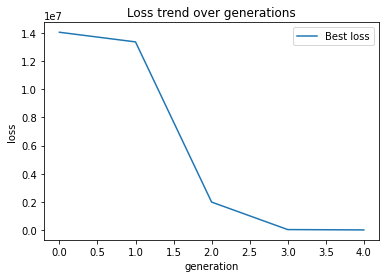

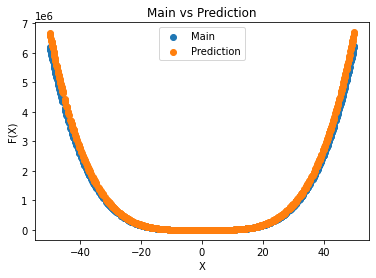

In [57]:
func = Pow(Param(0), Const(4))
dataset = Dataset(50, func, 1, (-10, 10))
data = dataset.point_value[0]
population = [ComplexTree((-2, 2)) for _ in range(5000)]
trainer = EvolutionaryTrainer(dataset, population, ComplexTree.breed, ComplexTree.mutate)
trainer.evolute(5, 0.1)
trainer.show_trend()
compare(func, trainer.best_sample, (-50, 50))

Best sample: 1.06 / x, Loss: 0.00850530310343324
Best sample: 1.0 / x, Loss: 1.1599300390642692e-05


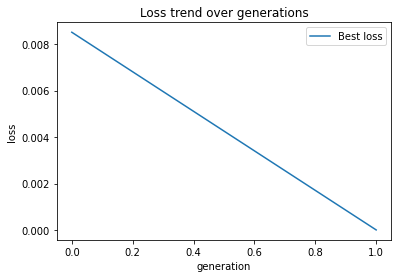

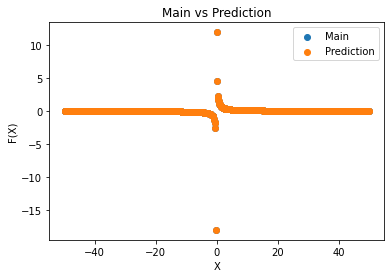

In [133]:
func = Div(Const(1), Param(0))
dataset = Dataset(50, func, 1, (-10, 10))
data = dataset.point_value[0]
population = [ComplexTree((-2, 2)) for _ in range(5000)]
trainer = EvolutionaryTrainer(dataset, population, ComplexTree.breed, ComplexTree.mutate)
trainer.evolute(5, 0.4)
trainer.show_trend()
compare(func, trainer.best_sample, (-50, 50))

Best sample: 0.97, Loss: 0.08062064147165485
Best sample: 0.97 + 1.43 / x, Loss: 0.014048990537190982
Best sample: 0.97 + 1.0 / x, Loss: 0.0007462879218998378


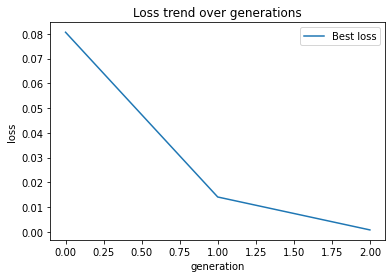

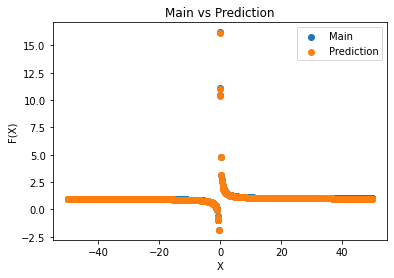

In [70]:
func = Div(Add(Param(0), Const(1)), Param(0))
dataset = Dataset(50, func, 1, (-10, 10))
data = dataset.point_value[0]
population = [ComplexTree((-2, 2)) for _ in range(500)]
trainer = EvolutionaryTrainer(dataset, population, ComplexTree.breed, ComplexTree.mutate)
trainer.evolute(10, 0.3)
trainer.show_trend()
compare(func, trainer.best_sample, (-50, 50))

Best sample: 0.97, Loss: 411.53451124426823
Best sample: 4.19 * 0.97, Loss: 401.55015583333096
Best sample: 3.27 + 0.97 + cos(x) * 0.97, Loss: 400.75111878188295
Best sample: 3.27 + 0.97 + cos(x) * x, Loss: 351.79666967836255
Best sample: x / 3.29 + cos(x) * (x + 0.74) + 3.27 + 0.97 + cos(x) * x, Loss: 336.5086368755237
Best sample: x / cos(x) + cos(x) * (x + 0.74) + cos(x) * (x + x - 0.58), Loss: 186.06504373342807
Best sample: x / cos(x) + cos(x) * (x + 0.74) + cos(x) * (x + (-0.89 - x) - 0.58), Loss: 49.00876273955324
Best sample: (x - -0.64) / cos(x) + cos(x) * (x + 0.74) + cos(x) * (x + (-0.89 - x) - 0.58), Loss: 21.328891065301914
Best sample: (x + 0.86) / cos(x) + cos(x) * (sin(x) + 0.74) + cos(x) * (x + (-0.89 - x) - 0.58), Loss: 1.2920963152923293
Best sample: (x + 0.86) / cos(x) + cos(x) * (sin(x) + 0.74) + cos(x) * (x + (-0.89 - x) - -0.62), Loss: 0.7202603019524146


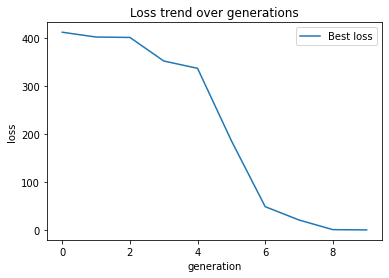

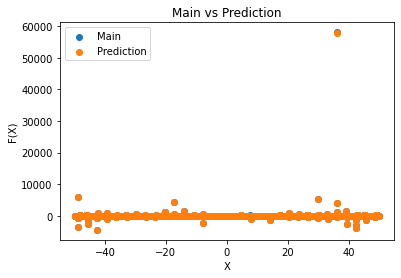

In [74]:
func = Div(Add(Param(0), Const(1)), Cos(Param(0)))
dataset = Dataset(50, func, 1, (-10, 10))
data = dataset.point_value[0]
population = [ComplexTree((-2, 2)) for _ in range(500)]
trainer = EvolutionaryTrainer(dataset, population, ComplexTree.breed, ComplexTree.mutate)
trainer.evolute(10, 0.3)
trainer.show_trend()
compare(func, trainer.best_sample, (-50, 50))

Best sample: x - -1.95, Loss: 152528.3355542443
Best sample: (x - -6.92) * (x - -1.95), Loss: 120332.308485702
Best sample: (x - -6.92) * (x - -1.95) + (x - -20.05) * (x - -1.95), Loss: 72813.67739926267
Best sample: (x - -6.92) * (x - -1.95) + (x - -20.05) * (x - -1.95) + (x - -6.92) * (x - -1.95) + (x - -20.05) * (x - 5.37), Loss: 53258.62276917616
Best sample: (x - -1.95) * ((x * (x + -0.12)) - -13.04), Loss: 20149.302918465688
Best sample: (x - -1.95) * ((x * (x + -0.12)) - (x - -0.07)), Loss: 1450.6869449140497
Best sample: ((x + -0.79) - -1.95) * ((x * (x + -0.12)) - x), Loss: 57.46936495511442
Best sample: ((x - 0.85) - -1.95) * ((x * (x + -0.12)) - ((x - 0.95) - -0.07)), Loss: 4.727760535015854
Best sample: ((x - 0.85) - -1.95) * ((x * (x + -0.12)) - ((x - 0.95) - -0.07)), Loss: 4.727760535015854
Best sample: ((x - 0.85) - -1.95) * ((x * (x + -0.12)) - ((x - 0.95) - -0.07)), Loss: 4.727760535015854


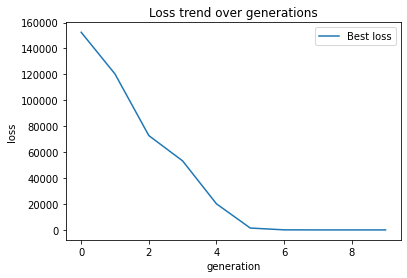

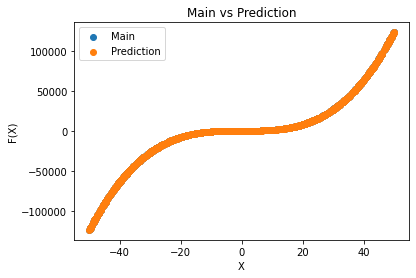

In [65]:
func = Pow(Param(0), Const(3))
dataset = Dataset(50, func, 1, (-10, 10))
data = dataset.point_value[0]
population = [ComplexTree((-2, 2)) for _ in range(500)]
trainer = EvolutionaryTrainer(dataset, population, ComplexTree.breed, ComplexTree.mutate)
trainer.evolute(10, 0.3)
trainer.show_trend()
compare(func, trainer.best_sample, (-50, 50))

Best sample: y + -0.06, Loss: 33.04351400820336
Best sample: y + x, Loss: 0.0


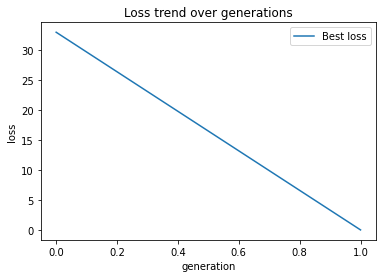

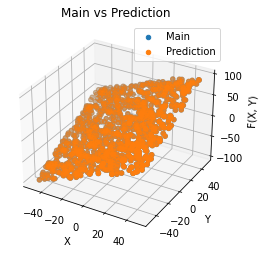

In [102]:
func = Add(Param(0), Param(1))
dataset = Dataset(500, func, 2, (-10, 10))
data = dataset.point_value[0]
population = [ComplexTree((-2, 2), dim= 2) for _ in range(500)]
trainer = EvolutionaryTrainer(dataset, population, ComplexTree.breed, ComplexTree.mutate)
trainer.evolute(10, 0.3)
trainer.show_trend()
compare_3d(func, trainer.best_sample, (-50, 50))

Best sample: y - 0.01, Loss: 0.46468286472065856
Best sample: y + sin(x), Loss: 0.0


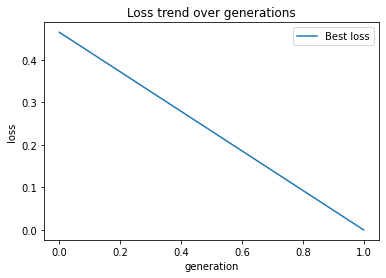

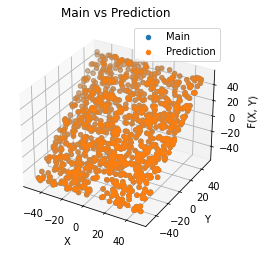

In [104]:
func = Add(Sin(Param(0)), Param(1))
dataset = Dataset(500, func, 2, (-10, 10))
data = dataset.point_value[0]
population = [ComplexTree((-2, 2), dim= 2) for _ in range(500)]
trainer = EvolutionaryTrainer(dataset, population, ComplexTree.breed, ComplexTree.mutate)
trainer.evolute(10, 0.3)
trainer.show_trend()
compare_3d(func, trainer.best_sample, (-50, 50))

Best sample: sin(y), Loss: 0.46299304775107986
Best sample: sin(x) + sin(y), Loss: 0.0


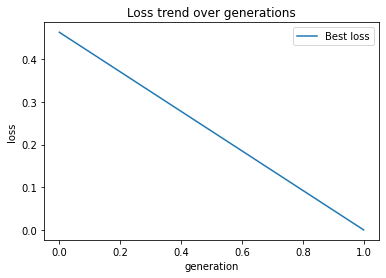

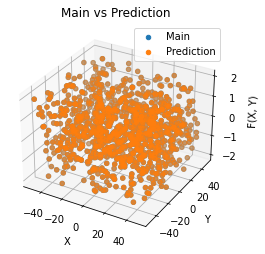

In [105]:
func = Add(Sin(Param(0)), Sin(Param(1)))
dataset = Dataset(500, func, 2, (-10, 10))
data = dataset.point_value[0]
population = [ComplexTree((-2, 2), dim= 2) for _ in range(500)]
trainer = EvolutionaryTrainer(dataset, population, ComplexTree.breed, ComplexTree.mutate)
trainer.evolute(10, 0.3)
trainer.show_trend()
compare_3d(func, trainer.best_sample, (-50, 50))

Best sample: y - -1.94, Loss: 1206.6857536246848
Best sample: (y - -1.6) * ((x - 0.57) - -1.93), Loss: 222.69097853371971
Best sample: (y - -0.43) * ((x - 0.7) - -1.93), Loss: 152.8695631368244
Best sample: (y - (x * -0.13)) * ((x - 0.7) - -1.93), Loss: 103.6071915306388
Best sample: (y - (x * -0.13)) * ((x - 2.06) - -2.1), Loss: 47.23259321901424
Best sample: (y - ((x - -0.89) * -0.14)) * ((x - 2.06) - -1.93), Loss: 45.96415340465941
Best sample: (y - ((x - (x * -0.13)) * -0.14)) * ((x - 2.06) - -1.97), Loss: 44.088668857988594
Best sample: (y - ((x - ((x + 0.43) * -0.13)) * -0.14)) * (((x - -0.08) - 2.06) - -1.93), Loss: 44.02649329246463
Best sample: (y - ((x - ((x + x * 0.83) * -0.13)) * -0.14)) * (((x - -0.08) - 2.06) - -1.93), Loss: 43.864410955905164
Best sample: (y - ((x - ((x + x * 0.83) * -0.13)) * -0.14)) * (((x - -0.08) - 2.06) - -1.93), Loss: 43.864410955905164


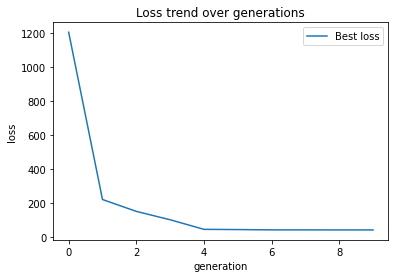

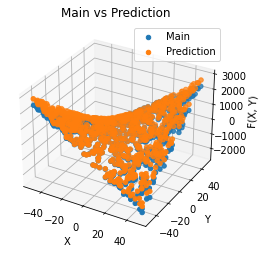

In [106]:
func = Add(Mul(Param(0), Param(1)), Const(10))
dataset = Dataset(500, func, 2, (-10, 10))
data = dataset.point_value[0]
population = [ComplexTree((-2, 2), dim= 2) for _ in range(500)]
trainer = EvolutionaryTrainer(dataset, population, ComplexTree.breed, ComplexTree.mutate)
trainer.evolute(10, 0.3)
trainer.show_trend()
compare_3d(func, trainer.best_sample, (-50, 50))

Best sample: -0.72, Loss: 9.490580359791931
Best sample: x * -0.12 + -0.72, Loss: 9.32671988156338
Best sample: (x * -0.12) * (x / 4.39), Loss: 9.11214003835338
Best sample: ((x * -0.12) * (x / 4.39)) * ((x * -0.12) * (x / -4.02)), Loss: 8.938190989348021
Best sample: x * sin(y), Loss: 0.0


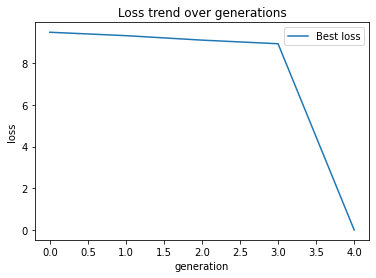

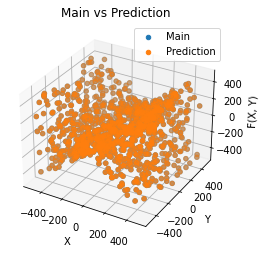

In [36]:
func = Mul(Param(0), Sin(Param(1)))
dataset = Dataset(50, func, 2, (-7, 7))
data = dataset.point_value[0]
population = [ComplexTree((-2, 2), dim= 2) for _ in range(500)]
trainer = EvolutionaryTrainer(dataset, population, ComplexTree.breed, ComplexTree.mutate)
trainer.evolute(15, 0.3, basic_constrcutor= ComplexTree)
trainer.show_trend()
compare_3d(func, trainer.best_sample, (-500, 500))

Best sample: 0.05, Loss: 0.216132049522116
Best sample: 0.73 * 0.05, Loss: 0.21596281955527308
Best sample: (1.06 + -0.01) * (0.05 + -0.01), Loss: 0.215962349575763
Best sample: cos(x) * -0.01 + (1.06 + -0.01) * (0.05 + -0.01), Loss: 0.21573567810690608
Best sample: cos(x + -0.95) * -0.01 + 0.05 + -0.01, Loss: 0.21553164657403046
Best sample: cos(x * 0.08 + -0.95) * -0.01 + 0.05 + -0.01, Loss: 0.2143413761920185
Best sample: (cos(x * -0.96 + -0.95) * -0.01 + 0.05 + -0.01) * (cos(x * 0.08 + -0.95) * -4.4 + 0.05 + -0.01), Loss: 0.20895062519303903
Best sample: (cos(x * -0.96 + -0.95) * -0.01 + 0.05 + -0.01) * (cos(x * 0.08 + -0.95) * -4.4 + 0.05 + -0.01), Loss: 0.20895062519303903
Best sample: cos(x * -0.96 + 0.63) * -0.01 + 0.05 + -0.01 + cos(y) * -0.12, Loss: 0.2079846586849194
Best sample: cos(y) * sin(x), Loss: 0.0


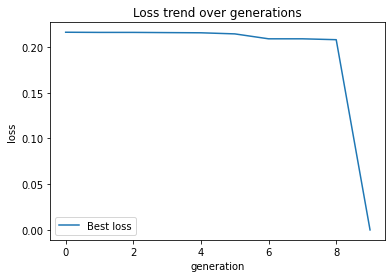

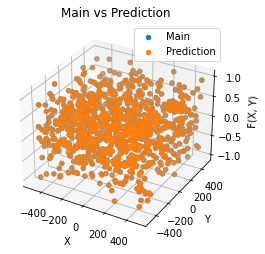

In [45]:
func = Mul(Sin(Param(0)), Cos(Param(1)))
dataset = Dataset(100, func, 2, (-100, 100))
data = dataset.point_value[0]
population = [ComplexTree((-2, 2), dim= 2) for _ in range(500)]
trainer = EvolutionaryTrainer(dataset, population, ComplexTree.breed, ComplexTree.mutate)
trainer.evolute(15, 0.3, basic_constrcutor= ComplexTree)
trainer.show_trend()
compare_3d(func, trainer.best_sample, (-500, 500))

Best sample: y - -1.22, Loss: 295.1969397633901
Best sample: y - -1.22 + y - (0.78 - x), Loss: 88.48058936458105
Best sample: x + x + 0.75 + y - -1.22 + y - (0.78 - x), Loss: 10.193417169633621
Best sample: x + x + -0.66 + y - -1.22 + y - (0.78 - x), Loss: 8.925709096142167
Best sample: x + x + -0.66 + y - -1.22 + y - (0.78 - (x * 0.63)), Loss: 6.288078134969598
Best sample: x + x + -0.66 + y - -1.22 + y - (0.78 - (x * 0.63)), Loss: 6.288078134969598
Best sample: x + x + -0.66 + y - -1.22 + y - (0.78 - (x * 0.63)), Loss: 6.288078134969598
Best sample: x + x + -0.66 + y - -1.22 + y - (0.78 - (x * 0.63)), Loss: 6.288078134969598
Best sample: x + x + -0.66 + y - -1.22 + y - (0.78 - (x * 0.63)), Loss: 6.288078134969598
Best sample: x + x + -0.66 + y - -1.22 + y - (0.78 - (x * 0.63)), Loss: 6.288078134969598
Best sample: x + x + -0.66 + y - -1.22 + y - (0.78 - (x * 0.63)), Loss: 6.288078134969598
Best sample: x + x + -0.66 + y - -1.22 + y - (0.78 - (x * 0.63)), Loss: 6.288078134969598
Best 

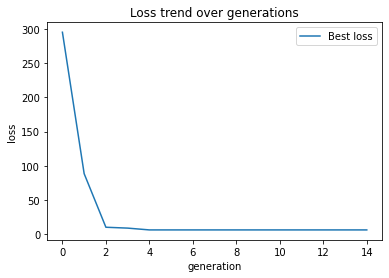

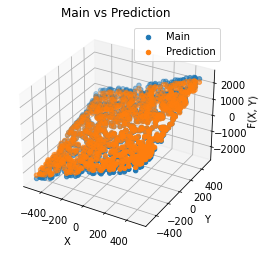

In [51]:
func = Add(Mul(Const(2.65), Param(0)), Mul(Const(2.41), Param(1)))
dataset = Dataset(100, func, 2, (-10, 10))
data = dataset.point_value[0]
population = [ComplexTree((-2, 2), dim= 2) for _ in range(500)]
trainer = EvolutionaryTrainer(dataset, population, ComplexTree.breed, ComplexTree.mutate)
trainer.evolute(15, 0.3, basic_constrcutor= ComplexTree)
trainer.show_trend()
compare_3d(func, trainer.best_sample, (-500, 500))

Best sample: x - -2.0, Loss: 5212.868550238558
Best sample: ((x * 0.08) - -2.0) * (x - -2.0), Loss: 5160.4297496923145
Best sample: ((1.47 / x) - -2.0) * (x - -2.0), Loss: 5099.50937451949
Best sample: ((1.47 / (x * 0.86)) - -2.0) * (x - -2.0) + 8.59 / x, Loss: 4978.81394253995
Best sample: ((1.47 / (x * 0.86)) - -2.0) * (x - -2.0) + 8.59 / (0.68 - x), Loss: 4849.647409329888
Best sample: ((1.47 / (x * 0.86)) - -2.0) * (x - -2.0) + 8.59 / (0.68 - x), Loss: 4849.647409329888
Best sample: 12.32 / (0.74 - x) + ((1.47 / x) - -2.0) * (x - -4.96), Loss: 4813.393196384434
Best sample: ((9.55 / (x * (x + 0.8))) - -2.0) * (x - -2.0) + 12.32 / (0.74 - x) + ((1.47 / x) - sin(x)) * (x - -4.96), Loss: 4689.619799997204
Best sample: ((9.55 / (x * (x + 0.8))) - -2.0) * (x - -2.0) + 12.32 / (0.74 - x) + ((1.47 / x) - sin(x)) * (x - -4.96), Loss: 4689.619799997204
Best sample: ((9.55 / (x * (x + 0.8))) - -2.0) * (x - -2.0) + 12.32 / (0.74 - x) + ((1.47 / x) - sin(x)) * (x - -4.96), Loss: 4689.619799997

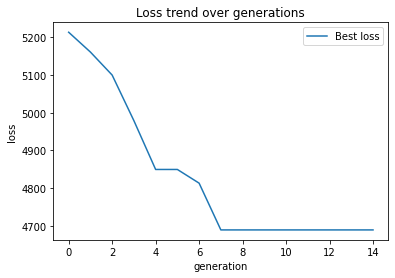

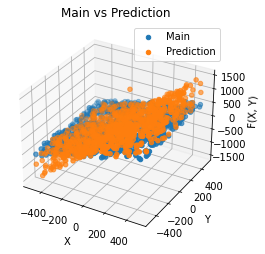

In [59]:
func = Add(Param(0), Mul(Const(100), Sin(Mul(Param(0), Param(1)))))
dataset = Dataset(100, func, 2, (-10, 10))
data = dataset.point_value[0]
population = [ComplexTree((-2, 2), dim= 2) for _ in range(1000)]
trainer = EvolutionaryTrainer(dataset, population, ComplexTree.breed, ComplexTree.mutate)
trainer.evolute(15, 0.3, basic_constrcutor= ComplexTree)
trainer.show_trend()
compare_3d(func, trainer.best_sample, (-500, 500))

Best sample: x * -1.92, Loss: 14024361.092266286
Best sample: x * (x / 1.62) + x * -1.92, Loss: 4941110.254977575
Best sample: x * (x / 1.62) + x * -12.77, Loss: 2565783.363754745
Best sample: x * ((x * -0.15) / 1.62) + x * -12.77 + x * (x / 1.62) + x * -12.77, Loss: 844193.960167778
Best sample: x * ((x * -0.15) / 1.62) + x * -12.77 + x * (x / 1.62) + x * -12.77, Loss: 844193.960167778
Best sample: x * (x / 1.62) + (x + 0.93) * -27.38, Loss: 837721.1702856515
Best sample: x * (x / 1.62) + (x + 0.93) * -35.23, Loss: 611292.84669794
Best sample: x * ((x * 0.83) / 1.62) + (x + 0.93) * -35.23, Loss: 346747.9565185186
Best sample: x * ((x * 0.83) / 1.62) + (x + 0.93) * -37.28, Loss: 334228.6696324675
Best sample: x * ((x * 0.83) / 1.62) + (x + 3.32) * -37.28, Loss: 324651.58590126317
Number of generations: 10, Number of examinations: 500.0
Execution time: 5.611530065536499


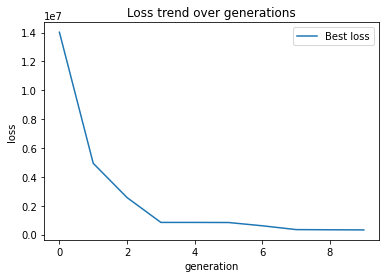

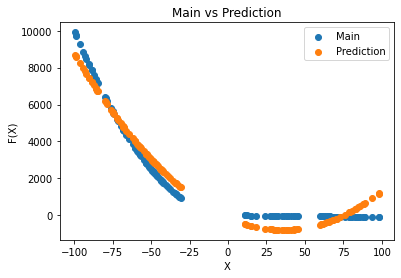

In [128]:
func = Pow(Param(0), Const(2))
dataset = Dataset(80, func, 1, (-100, -30))
func = Sub(Sub(Const(0), Param(0)), Const(3))
dataset.add_dataset(Dataset(50, func, 1, (10, 100)))
population = [ComplexTree((-2, 2)) for _ in range(500)]
trainer = EvolutionaryTrainer(dataset, population, ComplexTree.breed, ComplexTree.mutate)
trainer.evolute(10, 0.1)
# trainer.evolute(20, 0.01)
trainer.show_trend()
compare(func, trainer.best_sample, (-50, 50), dataset)

Best sample: cos(x), Loss: 35.22668231329773
Best sample: cos(x + -0.6) + cos(x), Loss: 34.41102921985675
Best sample: cos(0.61 - (x * 0.72)) + cos(x) + cos(x + -0.6) + cos(x), Loss: 34.11617194132951
Best sample: cos(x - 0.47) + cos(x * (-0.43 - x)) + cos(x - 0.47) + cos(x * 0.98), Loss: 33.969889471979876
Best sample: cos(x - 0.47) + cos(x * (-3.92 - x)), Loss: 33.20389327217235
Best sample: cos((x - -0.02) - 0.47) + cos(x * (-3.92 - x)) + cos(x - 0.47) + cos(x * (-0.43 - sin(x))), Loss: 30.732209960584886
Best sample: cos((x - -0.02) - 0.47) + cos(x * (-3.92 - x)) + cos(x - 0.47) + cos(x * (-0.43 - sin(x))), Loss: 30.732209960584886
Best sample: cos((x - -0.02) - 0.47) + cos(x * (-3.92 - x)) + cos(x - 0.47) + cos(x * (-0.43 - sin(x))), Loss: 30.732209960584886
Best sample: cos((x - -0.02) - 0.47) + cos(x * (-3.92 - x)) + cos(x - 0.47) + cos(x * (-0.43 - sin(x))), Loss: 30.732209960584886
Best sample: cos((x - -0.02) - 0.47) + cos(x * (-3.92 - x)) + cos(x - 0.47) + cos(x * (-0.43 - s

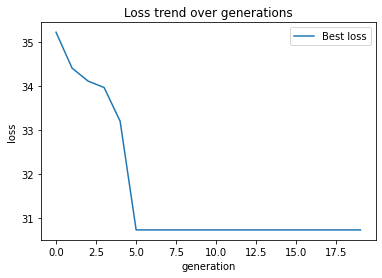

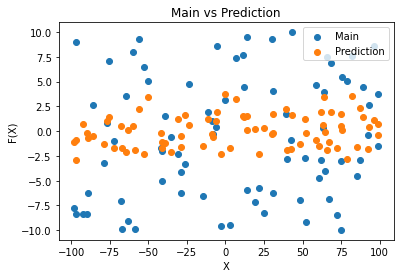

In [143]:
func = None
dataset = Dataset(80, func, 1, (-100, 100))
population = [ComplexTree((-2, 2)) for _ in range(500)]
trainer = EvolutionaryTrainer(dataset, population, ComplexTree.breed, ComplexTree.mutate)
trainer.evolute(20, 0.1)
# trainer.evolute(20, 0.01)
trainer.show_trend()
compare(func, trainer.best_sample, (-50, 50), dataset)